In [1]:
# unitvelo environment
# based on https://github.com/linnykos/veloUncertainty/blob/main/code/yuhong/pancreas/methods/utv/v2_pan_utv_3plots.py
import scvelo as scv
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import anndata as ad

In [2]:
method = 'utv'
dataset_long = 'pancreas'
dataset_short = 'pan'

data_folder = "/home/users/kzlin/kzlinlab/projects/veloUncertainty/out/yuhong/data/"
fig_folder = "/home/users/kzlin/kzlinlab/projects/veloUncertainty/git/veloUncertainty/fig/yuhong/v2_"+dataset_long+"/"+method+"/"

total = scv.read(data_folder+'v2_'+dataset_long+'/'+method+'/adata_'+dataset_short+'_'+method+'_total_v2.h5ad') # 

In [3]:
total

AnnData object with n_obs × n_vars = 3696 × 2000
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_r2', 'scaling', 'velocity_genes', 'fit_vars', 'fit_varu', 'fit_gamma', 'fit_beta', 'fit_offset', 'fit_a', 'fit_t', 'fit_h', 'fit_intercept', 'fit_loss', 'fit_llf', 'fit_sr2', 'fit_ur2'
    uns: 'base_function', 'basis', 'clusters_coarse_colors', 'clusters_colors', 'datapath', 'day_colors', 'label', 'log1p', 'loss', 'neighbors', 'par_names', 'pca', 'temp', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'Ms', 'Mu', 'Mu_scale', 'fit_t', 'spliced', 'spliced_original', 'unspliced', 'unspliced_original', 

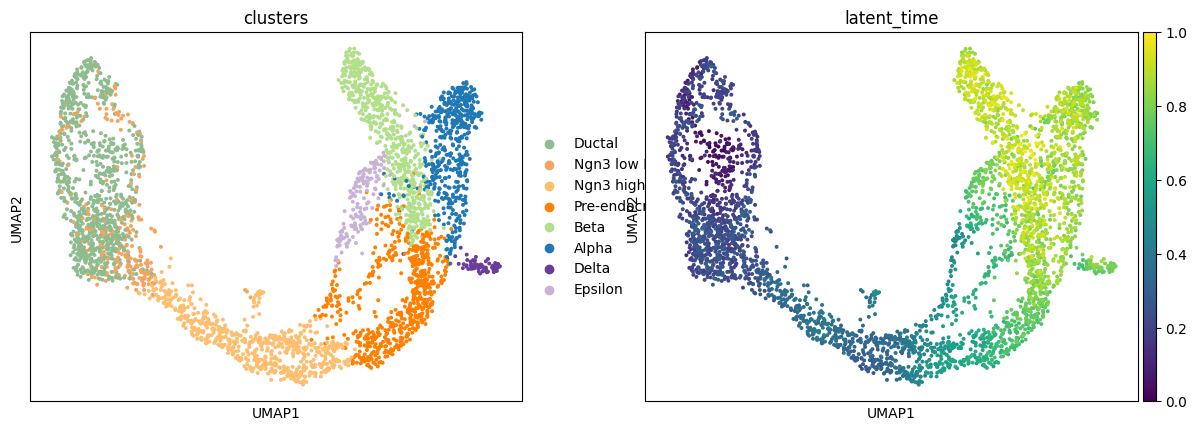

In [4]:
sc.pl.umap(
    total,
    color=["clusters", "latent_time"]
)

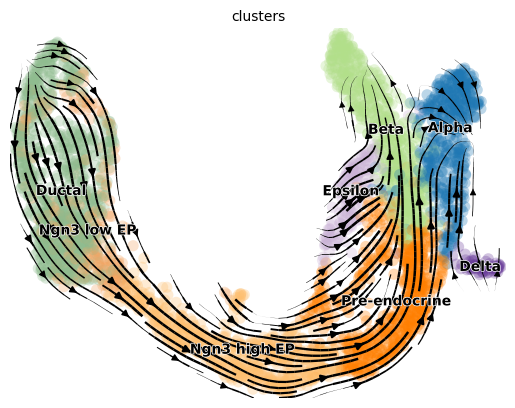

In [5]:
scv.pl.velocity_embedding_stream(total, 
                                 color="clusters", 
                                 dpi=100)

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


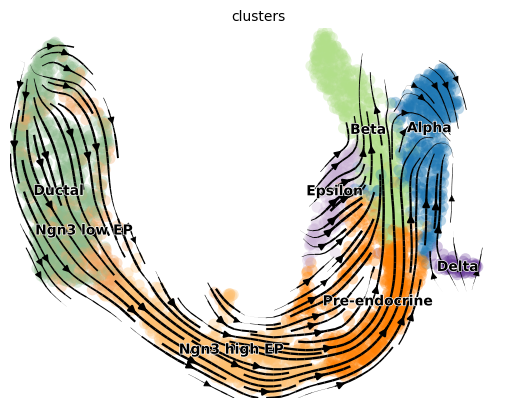

In [6]:
scv.pl.velocity_embedding_stream(total, 
                                 recompute=True,
                                 color="clusters", 
                                 dpi=100)

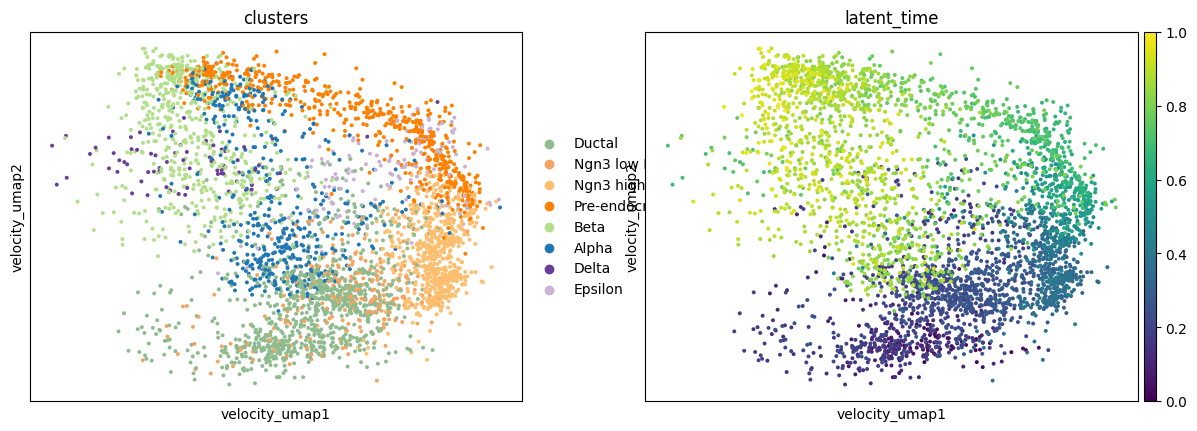

In [7]:
sc.pl.embedding(
    total,
    color=["clusters", "latent_time"],
    basis="velocity_umap"
)
# this doesn't seem useful

Creating our own umap now

In [8]:
sc.tl.umap(total)

2024-07-18 13:12:34.727131: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-18 13:12:34.732287: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-18 13:12:34.748171: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-18 13:12:34.775687: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-18 13:12:34.782537: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-18 13:12:34.801033: I tensorflow/core/platform/cpu_feature_gu

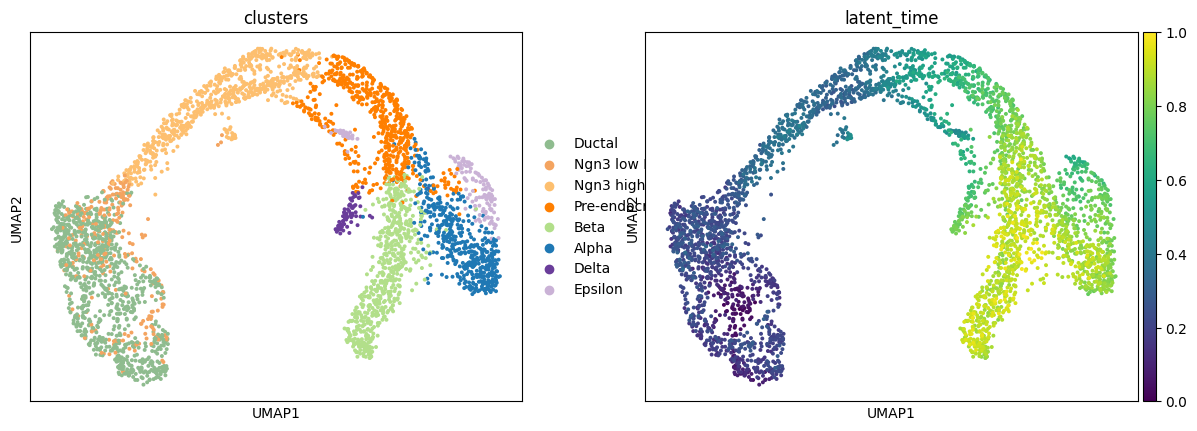

In [9]:
sc.pl.umap(
    total,
    color=["clusters", "latent_time"]
)

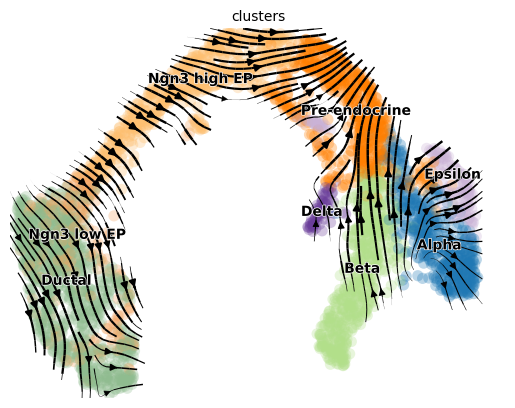

In [10]:
scv.pl.velocity_embedding_stream(total, 
                                 color="clusters", 
                                 dpi=100)
# Yup.... definitely see it funny behavior. Time to start tracking down the culprit

In [11]:
total

AnnData object with n_obs × n_vars = 3696 × 2000
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_r2', 'scaling', 'velocity_genes', 'fit_vars', 'fit_varu', 'fit_gamma', 'fit_beta', 'fit_offset', 'fit_a', 'fit_t', 'fit_h', 'fit_intercept', 'fit_loss', 'fit_llf', 'fit_sr2', 'fit_ur2'
    uns: 'base_function', 'basis', 'clusters_coarse_colors', 'clusters_colors', 'datapath', 'day_colors', 'label', 'log1p', 'loss', 'neighbors', 'par_names', 'pca', 'temp', 'velocity_graph', 'velocity_graph_neg', 'velocity_params', 'umap'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'Ms', 'Mu', 'Mu_scale', 'fit_t', 'spliced', 'spliced_original', 'unspliced', 'unspliced_ori

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


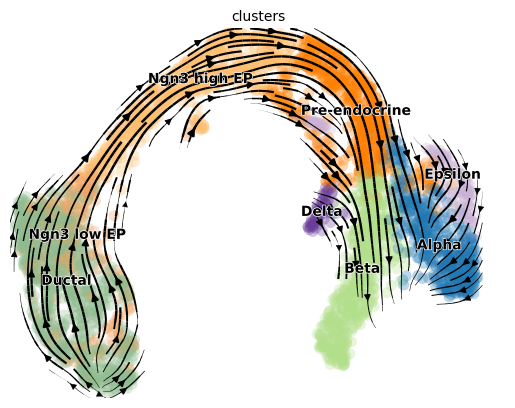

In [12]:
scv.pl.velocity_embedding_stream(total, 
                                 recompute=True,
                                 color="clusters", 
                                 dpi=100)